#### <p style="text-align: center; font-family:cm; font-size:1.8em;">Plot modelos de ME</p>

#### <p style="text-align: center; font-family:cm; font-size:1em;">A Matéria Escura (ME) é um dos maiores problemas em aberto na Física. Como parte do projeto de pesquisa "A distribuição de Matéria Escura e sua conexão com os observáveis", como bolsista do programa PICT-ON do Observatório Nacional, este código tem como objetivo permitir compreender melhor o comportamento da ME na Via Láctea e, consequentemente, em outros corpos celestes. Foram plotados diversos gráficos, como: plot dos perfis de densidade da Matéria Escura, plot dos diferentes J-factors de aniquilação e decaimento para cada perfil, plot do J-factor em função da latitude e longitude galácticas e, por fim, utilização desses plots barra o cálculo do J barra, ou seja, da média do J-factor para uma região de ângulo sólido do céu. Como base para as informações da distribuição da ME foi utilizado o <em>PPPC 4 DM ID</em> ([Cirelli et. al, 2012](https://arxiv.org/abs/1012.4515)) e, para fins de comparação dos gráficos de J-factor por <em>l</em> e <em>b</em>, foi utilizada a dissertação <em>Exploring the inert doublet model of dark matter with very high-energy gamma-rays observatories</em> (Justino, 2024). </p>

#### <p style="text-align: center; font-family:cm; font-size:1em;">Dados fornecidos no artigo que utilizarei no código: </p>

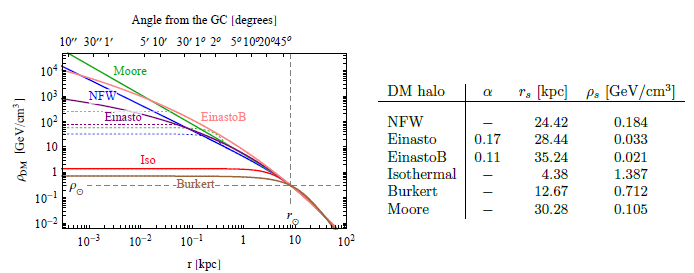

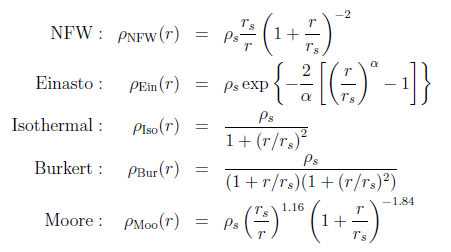

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import quad
from scipy.integrate import simpson
from scipy.integrate import dblquad
from scipy import integrate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
r = np.logspace(-3.5, 2, 100)

In [3]:
def NFW (r):
    r_s_n = 24.42
    rho_s_n = 0.184
    
    rho_NFW = rho_s_n * (r_s_n/r) * (1 + (r/r_s_n))**(-2)
    
    plt.plot(r, rho_NFW)
    plt.ylim(np.min(rho_NFW), np.max(rho_NFW))
    plt.text(0.001, 1000, 'NFW', fontsize=11, color='blue', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [4]:
def Einasto (r):
    r_s_e = 28.44
    rho_s_e = 0.033
    alpha_e = 0.17
    
    rho_ein = rho_s_e * np.exp((-2/alpha_e) * ((r/r_s_e)**(alpha_e) - 1))
    
    plt.plot(r, rho_ein, color='#f29b20')
    plt.ylim(np.min(rho_ein), np.max(rho_ein))
    plt.text(0.004, 100, 'Einasto', fontsize=11, color='#f29b20', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [5]:
def Einasto_B (r):
    r_s_eb = 35.24
    rho_s_eb = 0.021
    alpha_eb = 0.11
    
    rho_ein_b = rho_s_eb * np.exp((-2/alpha_eb) * ((r/r_s_eb)**(alpha_eb) - 1))
    
    plt.plot(r, rho_ein_b, color='#04a001')
    plt.ylim(np.min(rho_ein_b), np.max(rho_ein_b))
    plt.text(0.4, 50, 'EinastoB', fontsize=11, color='#04a001', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [6]:
def Isothermal (r):
    r_s_i = 4.38
    rho_s_i = 1.387
    
    rho_iso = (rho_s_i)/(1 + (r/r_s_i)**2)
    
    plt.plot(r, rho_iso, color='#e92200')
    plt.ylim(np.min(rho_iso), np.max(rho_iso))
    plt.text(1e-3, 3, 'Isothermal', fontsize=11, color='#e92200', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='white'))

In [7]:
def Burkert (r):
    r_s_b = 12.67
    rho_s_b = 0.712
    
    rho_bur = ((rho_s_b)/((1+(r/r_s_b)) * (1+(r/r_s_b)**2)))
    
    plt.plot(r, rho_bur, color='#a349c4')
    plt.ylim(np.min(rho_bur), np.max(rho_bur))
    plt.text(1e-1, 3e-1, 'Burkert', fontsize=11, color='#a349c4', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [8]:
def Moore (r):
    r_s_m = 30.28
    rho_s_m = 0.105
    
    rho_moo = ((rho_s_m) * ((r_s_m/r)**(1.16) * (1 + (r/r_s_m))**(-1.84)))
    
    plt.plot(r, rho_moo, color='#755319')
    plt.ylim(np.min(rho_moo), np.max(rho_moo))
    plt.text(3e-3, 9e3, 'Moore', fontsize=11, color='#755319', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='white'))

In [9]:
def grafico ():  
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "text.latex.preamble": r"\usepackage{mathptmx}" 
    })

    plt.title('Perfis de Matéria Escura')
    
    plt.xlabel('r (kpc)')
    plt.ylabel(r'$\rho_{DM} (GeV/cm^3)$')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(r[0], r[-1])
    
    plt.axhline(y = 0.3, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x = 8.33, color='gray', linestyle='--', linewidth=1)
    
    plt.text(7.3, 4e-3, r'$r_\odot$', fontsize=13, color='black', 
             bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
    plt.text(4e-4, 0.2, r'$\rho_\odot$', fontsize=13, color='black', 
             bbox=dict(facecolor='white', alpha=1, edgecolor='white'))

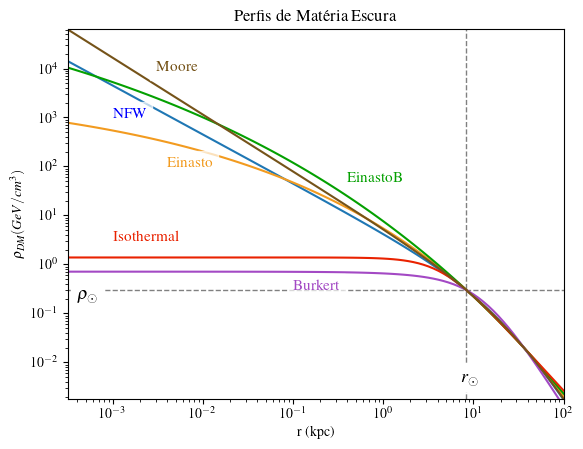

In [10]:
grafico()
NFW(r)
Einasto(r)
Einasto_B(r)
Isothermal(r)
Burkert(r)
Moore(r);

#### <p style="text-align: center; font-family:cm; font-size:1.8em;">J-factor</p>

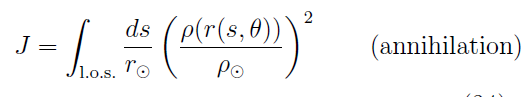

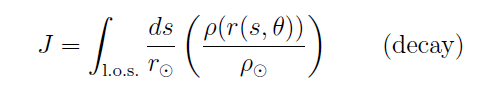

### J-factor Aniquilação

In [11]:
rho_sol = 0.3
r_sol = 8.33

In [12]:
#Definindo os perfis
def rho_NFW(r):
    r_s = 24.42 
    rho_s = 0.184
    return rho_s * (r_s / r) * (1 + (r / r_s))**(-2)

def rho_Einasto(r):
    r_s_e = 28.44 
    rho_s_e = 0.033 
    alpha_e = 0.17
    return rho_s_e * np.exp((-2 / alpha_e) * ((r / r_s_e)**alpha_e - 1))

def rho_EinastoB(r):
    r_s_eb = 35.24
    rho_s_eb = 0.021
    alpha_eb = 0.11
    return rho_s_eb * np.exp((-2/alpha_eb) * ((r/r_s_eb)**(alpha_eb) - 1))

def rho_Isothermal(r):
    r_s_i = 4.38
    rho_s_i = 1.387
    return (rho_s_i)/(1 + (r/r_s_i)**2)

def rho_Burkert(r):
    r_s_b = 12.67
    rho_s_b = 0.712
    return ((rho_s_b)/((1+(r/r_s_b)) * (1+(r/r_s_b)**2)))

def rho_Moore(r):
    r_s_m = 30.28
    rho_s_m = 0.105
    return ((rho_s_m) * ((r_s_m/r)**(1.16) * (1 + (r/r_s_m))**(-1.84)))

In [13]:
#Realizando a integração
def integrand_aniq (l, theta_rad, rho_func):
    r = np.sqrt(r_sol**2 + l**2 - 2 * r_sol * l * np.cos(theta_rad))
    return (rho_func(r)/rho_sol)**2 * 1/r_sol

def J_aniq(theta_rad, rho_func):
    L_aniq = np.linspace(1e-9, 13, 10000)
    integral_aniq = integrand_aniq(L_aniq, theta_rad, rho_func)
    return simpson(integral_aniq, L_aniq)

In [14]:
#J Factors aniquilação
theta_deg = np.linspace(1e-9, 180, 1000)
theta_rad = np.radians(theta_deg)

J_aniq_NFW = [J_aniq(theta, rho_NFW) for theta in theta_rad]
J_aniq_Ein = [J_aniq(theta, rho_Einasto) for theta in theta_rad]
J_aniq_EinB = [J_aniq(theta, rho_EinastoB) for theta in theta_rad]
J_aniq_Iso = [J_aniq(theta, rho_Isothermal) for theta in theta_rad]
J_aniq_Bur = [J_aniq(theta, rho_Burkert) for theta in theta_rad]
J_aniq_Moo = [J_aniq(theta, rho_Moore) for theta in theta_rad]

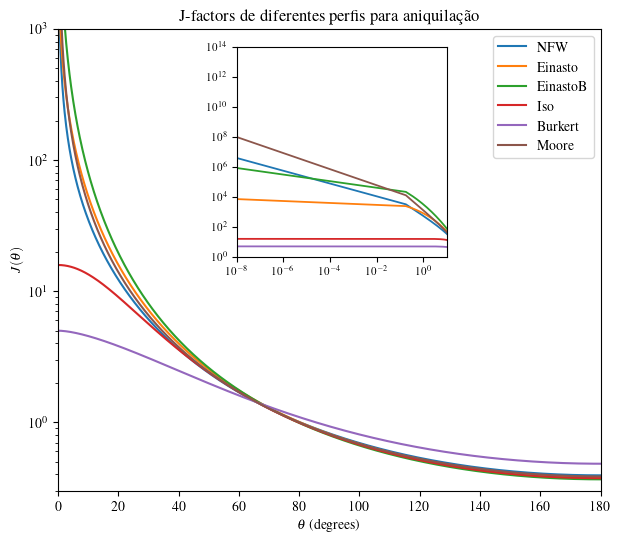

In [15]:
fig, ax = plt.subplots(figsize=(7,6))

plots_aniq = ([J_aniq_NFW, 'NFW'], [J_aniq_Ein, 'Einasto'], [J_aniq_EinB, 'EinastoB'], 
              [J_aniq_Iso, 'Iso'], [J_aniq_Bur, 'Burkert'], [J_aniq_Moo, 'Moore'])

for J_profile in plots_aniq:
    ax.plot(theta_deg, J_profile[0], label=J_profile[1], linewidth=1.5)
    ax.set_xlim(0, 180)
    ax.set_ylim(0.3, 1e3)
    ax.set_yscale('log')
    ax.set_xlabel(r'$\theta$ (degrees)')
    ax.set_ylabel(r'$J(\theta)$')
    ax.set_title("J-factors de diferentes perfis para aniquilação")
    ax.legend()

#Adicionando o subplot com o zoom
ax_inset = fig.add_axes([0.38, 0.5, 0.3, 0.35])  

for J_profile in plots_aniq:
    ax_inset.plot(theta_deg, J_profile[0], linewidth=1.3)
    ax_inset.set_xscale("log")
    ax_inset.set_yscale("log")
    ax_inset.set_xlim(1e-8, 10)
    ax_inset.set_ylim(1, 1e14)
    ax_inset.tick_params(axis='both', which='both', labelsize=8)

### J-factor decaimento

In [16]:
#Realizando a integração
def integrand_dec(L, theta_rad, rho_func):
    r = np.sqrt(np.clip(r_sol**2 + L**2 - 2 * r_sol * L * np.cos(theta_rad), 1e-10, None))
    return rho_func(r) / rho_sol / r_sol

def J_dec(theta_rad, rho_func):
    L_dec = np.linspace(10e-10, 1000, 100000)
    integral_dec = integrand_dec(L_dec, theta_rad, rho_func)
    return simpson(integral_dec, L_dec)

In [17]:
#J Factors decaimento
theta_deg = np.linspace(0.001, 180, 1000)
theta_rad = np.radians(theta_deg)

J_dec_NFW = [J_dec(theta, rho_NFW) for theta in theta_rad]
J_dec_Ein = [J_dec(theta, rho_Einasto) for theta in theta_rad]
J_dec_EinB = [J_dec(theta, rho_EinastoB) for theta in theta_rad]
J_dec_Iso = [J_dec(theta, rho_Isothermal) for theta in theta_rad]
J_dec_Bur = [J_dec(theta, rho_Burkert) for theta in theta_rad]
J_dec_Moo = [J_dec(theta, rho_Moore) for theta in theta_rad]

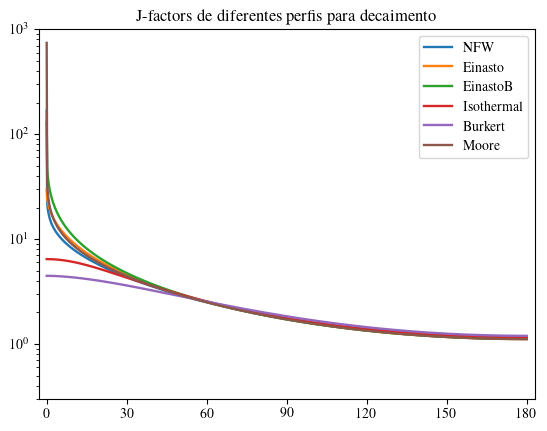

In [18]:
#Plot
plots_dec = ([J_dec_NFW, 'NFW'], [J_dec_Ein, 'Einasto'], [J_dec_EinB, 'EinastoB'], 
             [J_dec_Iso, 'Isothermal'], [J_dec_Bur, 'Burkert'],[J_dec_Moo, 'Moore'])
for J_dec in plots_dec:
    plt.plot(theta_deg, J_dec[0], label = J_dec[1], linewidth=1.7)
    plt.xticks(range(0, 181, 30))
    plt.xlim(-3, 183)
    plt.ylim(0.3, 1e3)
    plt.yscale('log')
    plt.figsize=(6,5)
    plt.legend(loc='best')
    plt.title("J-factors de diferentes perfis para decaimento")

##### <p style="text-align: center; font-family:times; font-size:2em;">Outra maneira de visualizar o J-factor - Integração Simps</p>

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil NFW</p>

In [19]:
#Parâmetros 
kpc_cm = 3.086e21

rho_sol = 0.3
r_sol = 8.33 

rho_s = 0.184
r_s = 24.42 

In [157]:
def integrand_J(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_nfw(r)**2

def rho_nfw(r):
    return (rho_s * (r_s/r)) * ((1 + (r/r_s))**(-2))

s_val = np.linspace(0, 100, 1000)

def J_nfw(l, b):
    f_val_NFW = integrand_J(s_val, l, b)
    return simpson(f_val_NFW, s_val) * kpc_cm

In [158]:
#Criando o meshgrid para o plot
l = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)

lv_deg, bv_deg = np.meshgrid(l, b)
lv_rad = np.radians(lv_deg)
bv_rad = np.radians(bv_deg)

Jmap = np.zeros_like(lv_rad)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap[i, j] = J_nfw(lv_rad[i, j], bv_rad[i, j])

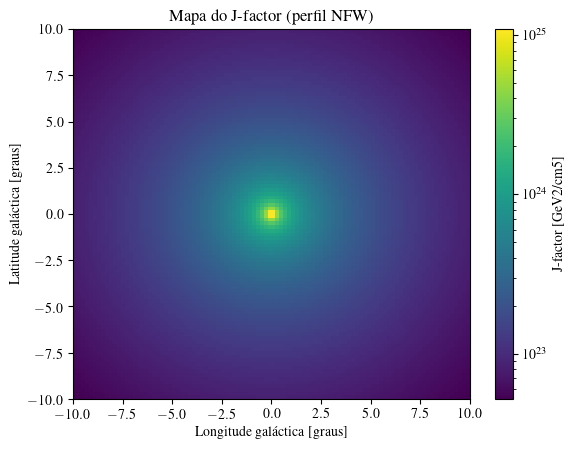

In [159]:
#Plot
plt.imshow(Jmap, extent=[l.min(), l.max(), b.min(), b.max()],
            aspect='auto', origin='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil NFW)")
plt.show()

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Einasto</p>

In [130]:
#Parâmetros 
alpha_e = 0.17
rho_s_e = 0.033
r_s_e = 28.44 

In [131]:
def rho_ein(r):
    return rho_s_e * np.exp((-2/alpha_e) * ((r/r_s_e)**alpha_e - 1))

def integrand_J_e(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_ein(r)**2

def J_ein(l, b):
    f_val_ein = integrand_J_e(s_val, l, b)
    return simpson(f_val_ein, s_val) * kpc_cm

In [132]:
Jmap_e = np.zeros_like(lv_rad)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_e[i, j] = J_ein(lv_rad[i, j], bv_rad[i, j])

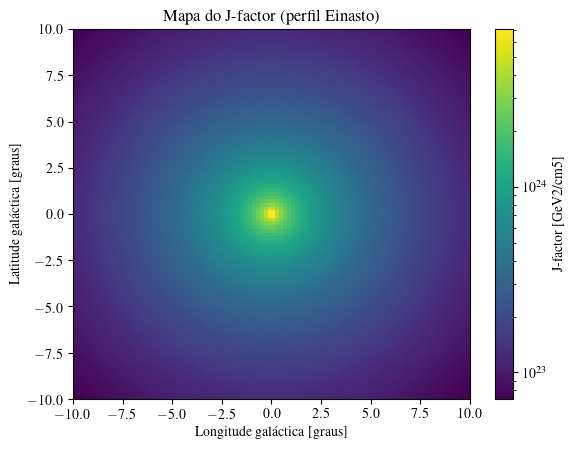

In [133]:
#Plot
plt.imshow(Jmap_e, extent=[l.min(), l.max(), b.min(), b.max()],
            aspect='auto', origin='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Einasto)")
plt.show()

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Einasto B</p>

In [134]:
#Parâmetros 
alpha_eb = 0.11
rho_s_eb = 0.021
r_s_eb = 35.24

In [135]:
def rho_einB(r):
    return rho_s_eb * np.exp((-2/alpha_eb) * ((r/r_s_eb)**alpha_eb - 1))

def integrand_J_eB(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_einB(r)**2

def J_einB(l, b):
    f_val_einB = integrand_J_eB(s_val, l, b)
    return simpson(f_val_einB, s_val) * kpc_cm

In [136]:
Jmap_eB = np.zeros_like(lv_rad)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_eB[i, j] = J_einB(lv_rad[i, j], bv_rad[i, j])

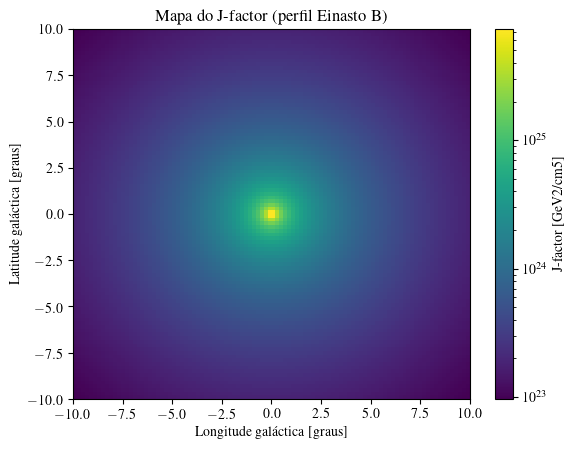

In [137]:
#Plot
plt.imshow(Jmap_eB, extent=[l.min(), l.max(), b.min(), b.max()],
            aspect='auto', origin='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Einasto B)")
plt.show()

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Moore</p>

In [138]:
#Parâmetros 
rho_s_m = 0.105
r_s_m = 30.28

In [139]:
def rho_moore(r):
    return rho_s_m * (r_s_m/r)**(1.16) * (1 + (r/r_s_m))**(-1.84) 

def integrand_J_m(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_moore(r)**2

def J_moore(l, b):
    f_val_m = integrand_J_m(s_val, l, b)
    return simpson(f_val_m, s_val) * kpc_cm

In [140]:
Jmap_m = np.zeros_like(lv_rad)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_m[i, j] = J_moore(lv_rad[i, j], bv_rad[i, j])

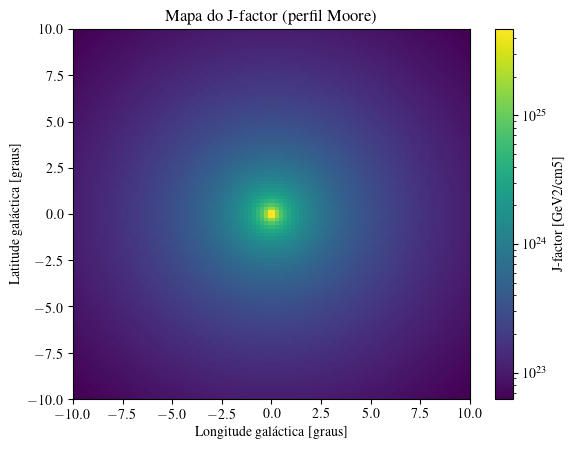

In [141]:
#Plot
plt.imshow(Jmap_m, extent=[l.min(), l.max(), b.min(), b.max()],
            aspect='auto', origin='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Moore)")
plt.show()

##### <p style="text-align: center; font-family:times; font-size:2em;">Perfil Burkert</p>

In [142]:
#Parâmetros 
r_s_b = 12.67
rho_s_b = 0.712

In [143]:
def rho_burkert(r):
    return ((rho_s_b)/((1+(r/r_s_b)) * (1+(r/r_s_b)**2)))

def integrand_J_b(s, l, b):
    r = (r_sol**2 + s**2 - 2*r_sol*s*np.cos(l)*np.cos(b))**(1/2)
    return rho_burkert(r)**2

def J_burket(l, b):
    f_val_b = integrand_J_b(s_val, l, b)
    return simpson(f_val_b, s_val) * kpc_cm

In [144]:
Jmap_b = np.zeros_like(lv_rad)

lv_deg, bv_deg = np.meshgrid(l, b)
lv_rad = np.radians(lv_deg)
bv_rad = np.radians(bv_deg)

for i in range(lv_rad.shape[0]):
    for j in range(lv_rad.shape[1]):
        Jmap_b[i, j] = J_burket(lv_rad[i, j], bv_rad[i, j])

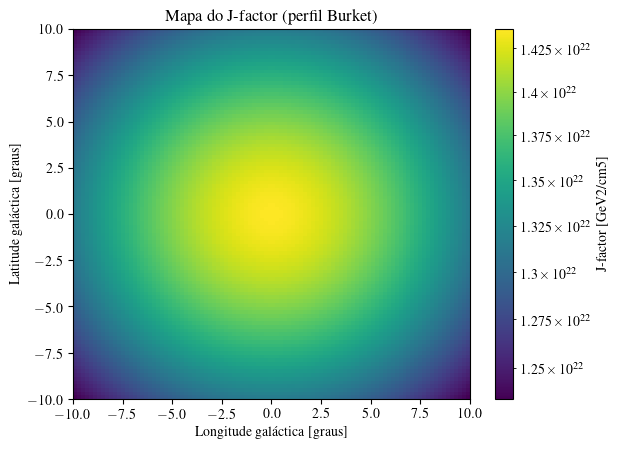

In [145]:
#Plot
plt.imshow(Jmap_b, extent=[l.min(), l.max(), b.min(), b.max()],
            aspect='auto', origin='lower', norm=matplotlib.colors.LogNorm())
plt.xlabel("Longitude galáctica [graus]")
plt.ylabel("Latitude galáctica [graus]")
plt.colorbar(label="J-factor [GeV2/cm5]")
plt.title("Mapa do J-factor (perfil Burket)")
plt.show()

##### <p style="text-align: center; font-family:times; font-size:2em;">Recriando a tabela de J-factor Médio por região do céu</p>

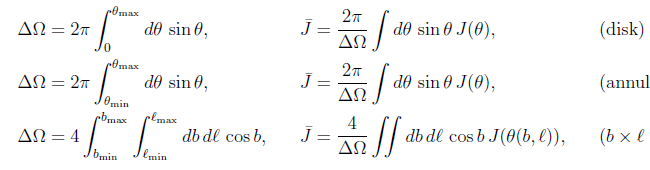

In [200]:
regiões = {'Gal Ridge': (np.radians(0), np.radians(0.3), np.radians(0), np.radians(0.8)),
           '3 x 3': (np.radians(0), np.radians(3), np.radians(0), np.radians(3)), 
           '5 x 5': (np.radians(0), np.radians(5), np.radians(0), np.radians(5)), 
           '5 x 30': (np.radians(0), np.radians(5), np.radians(0), np.radians(30)), 
           '10 x 10': (np.radians(0), np.radians(10), np.radians(0), np.radians(10)),
           '10 x 30': (np.radians(0), np.radians(10), np.radians(0), np.radians(30)), 
           '10 x 60': (np.radians(0), np.radians(10), np.radians(0), np.radians(60)), 
           'GP w/o GC': (np.radians(0), np.radians(5), np.radians(30), np.radians(180)), 
           "sides of GC": (np.radians(0), np.radians(10), np.radians(10), np.radians(30)), 
           'outer Galaxy': (np.radians(0), np.radians(10), np.radians(90), np.radians(180)), 
           '10 - 20': (np.radians(10), np.radians(20), np.radians(0), np.radians(180)), 
           '20 - 60': (np.radians(20), np.radians(60), np.radians(0), np.radians(180)), 
           'Gal Poles': (np.radians(60), np.radians(90), np.radians(0), np.radians(180)) }

modelos = {'J̄ NFW': J_nfw, 'J̄ Ein': J_ein, 'J̄ EinB': J_einB, 
           'J̄ Moo': J_moore, 'J̄ Bur': J_burket}

linhas = []

for região, (bmin, bmax, lmin, lmax) in regiões.items():
    # Calcular delta ângulo sólido
    def integrand_DOmega(l, b):
        return np.cos(b)

    DeltaOmega, _ = dblquad(integrand_DOmega,
                        bmin, bmax, lambda b: lmin, lambda b: lmax)
    DeltaOmega *= 4

    linha = {"Região": região, "ΔΩ": DeltaOmega}
    
    for nome, perfil in modelos.items():
        def integrand_J_barra_perfil(l, b):
            return (perfil(l, b) * np.cos(b)) * (4/DeltaOmega)
    
        J_barra_perfil, _ = dblquad(integrand_J_barra_perfil,
                            bmin, bmax, lambda b: lmin, lambda b: lmax)
        
        linha[nome] = (J_barra_perfil/kpc_cm)
    
    linhas.append(linha)

df = pd.DataFrame(linhas)
print(df)

          Região        ΔΩ       J̄ NFW       J̄ Ein      J̄ EinB  \
0      Gal Ridge  0.000292  1452.855046  1306.650923  9741.624931   
1          3 x 3  0.010961   231.600499   341.344583  1230.610939   
2          5 x 5  0.030423   131.224134   202.924548   607.097442   
3         5 x 30  0.182539    35.879170    54.027670   131.110387   
4        10 x 10  0.121229    58.446624    90.491629   216.690023   
5        10 x 30  0.363688    26.650721    39.620387    84.313152   
6        10 x 60  0.727376    14.658088    21.259105    43.680568   
7      GP w/o GC  0.912693     0.987882     1.029680     1.049875   
8    sides of GC  0.242459    10.752769    14.184766    18.124716   
9   outer Galaxy  1.091064     0.419695     0.408800     0.394865   
10       10 - 20  2.115825     2.422535     2.944545     3.507731   
11       20 - 60  6.584844     1.226296     1.303577     1.353563   
12     Gal Poles  1.683574     0.743246     0.736979     0.721350   

         J̄ Moo    J̄ Bur  
0   5

In [201]:
# modelos = {'J̄ NFW': J_nfw, 'J̄ Ein': J_ein, 'J̄ EinB': J_einB, 
#            'J̄ Moo': J_moore, 'J̄ Bur': J_burket}

# regiões = ['Gal Ridge', '3 x 3', '5 x 5', '5 x 30', '10 x 10',
#                 '10 x 30', '10 x 60', 'GP w/o GC', "sides of GC", 
#                 'outer Galaxy', '10 - 20', '20 - 60', 'Gal Poles']

# data = {}

# for nome, perfil in modelos.items():
#     def integrand_J_barra_perfil(l, b):
#         return (perfil(l, b) * np.cos(b)) * (4/DeltaOmega)
    
#     J_barra_perfil, _ = dblquad(integrand_J_barra_perfil,
#                         bmin, bmax, lambda b: lmin, lambda b: lmax)
    
#     data['ΔΩ'] = [DeltaOmega]
#     data[nome] = [J_barra_perfil/kpc_cm]

# df = pd.DataFrame(data, index=regiões)
# df.index.name = "Regiões"
# print(df)